In [11]:
import numpy as np

import tsplib95
import networkx as nx

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression



In [12]:
# create a function that can be used via df.apply that runs the 3 algorithmms on the given file from the row

def benchmark(row):
    # get the file
    f = row['file']
    f = 'Instances/' + f
    print(f'running {f}')

    _, gils_cost, gils_time = gilsrvnd.run(f)
    _, grasp_cost, grasp_time = grasp.run(f)
    _, dbmea_cost, dbmea_time = DBMEA.run(f)

    # add the results to the dataframe

    row['GRASP_cost'] = grasp_cost
    row['GRASP_time'] = grasp_time

    row['GILS_cost'] = gils_cost
    row['GILS_time'] = gils_time
    row['DBMEA_cost'] = dbmea_cost
    row['DBMEA_time'] = dbmea_time

    print(f'{f} done')

    return row


In [26]:
# train a model on the data that predicts gils
# get the data
df = pd.read_csv('srandom.csv')
df

,file,n,m,ratio1,ratio2,density,avg_clustering,mst_size,tsp_approx,edge_min,...,closeness_std,closeness_var,closeness_q25,closeness_q75,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,srandom_10_1.tsp,10,55,0.181818,5.5,1.222222,0.414072,9,78438.0,0.0,...,0.000092,8.524779e-09,0.000345,0.000492,0,0,0,0,0,0
1,srandom_15_11.tsp,15,120,0.125000,8.0,1.142857,0.421630,14,141877.0,0.0,...,0.000079,6.302363e-09,0.000329,0.000456,0,0,0,0,0,0
2,srandom_16_55.tsp,16,136,0.117647,8.5,1.133333,0.427203,15,171027.0,0.0,...,0.000091,8.320751e-09,0.000352,0.000508,0,0,0,0,0,0
3,srandom_18_53.tsp,18,171,0.105263,9.5,1.117647,0.424722,17,176552.0,0.0,...,0.000063,3.935094e-09,0.000330,0.000411,0,0,0,0,0,0
4,srandom_19_87.tsp,19,190,0.100000,10.0,1.111111,0.462766,18,138627.0,0.0,...,0.000071,5.052711e-09,0.000361,0.000463,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,srandom_91_96.tsp,91,4186,0.021739,46.0,1.022222,0.367393,90,1930185.0,0.0,...,0.000066,4.317079e-09,0.000352,0.000459,0,0,0,0,0,0
96,srandom_95_81.tsp,95,4560,0.020833,48.0,1.021277,0.387272,94,2021345.0,0.0,...,0.000052,2.721331e-09,0.000340,0.000424,0,0,0,0,0,0
97,srandom_96_63.tsp,96,4656,0.020619,48.5,1.021053,0.384503,95,2105686.0,0.0,...,0.000065,4.246357e-09,0.000355,0.000460,0,0,0,0,0,0
98,srandom_99_74.tsp,99,4950,0.020000,50.0,1.020408,0.383080,98,2229878.0,0.0,...,0.000068,4.648060e-09,0.000346,0.000461,0,0,0,0,0,0


In [27]:
# set gils, grasp, dbmea rows to 0
df['GILS_cost'] = 0
df['GILS_time'] = 0
df['GRASP_cost'] = 0
df['GRASP_time'] = 0
df['DBMEA_cost'] = 0
df['DBMEA_time'] = 0


In [28]:
df = df.apply(benchmark, axis=1)
df

running Instances/srandom_10_1.tsp
Instances/srandom_10_1.tsp done
running Instances/srandom_15_11.tsp
Instances/srandom_15_11.tsp done
running Instances/srandom_16_55.tsp
Instances/srandom_16_55.tsp done
running Instances/srandom_18_53.tsp
Instances/srandom_18_53.tsp done
running Instances/srandom_19_87.tsp
Instances/srandom_19_87.tsp done
running Instances/srandom_20_62.tsp
Instances/srandom_20_62.tsp done
running Instances/srandom_21_45.tsp
Instances/srandom_21_45.tsp done
running Instances/srandom_22_86.tsp
Instances/srandom_22_86.tsp done
running Instances/srandom_24_17.tsp
Instances/srandom_24_17.tsp done
running Instances/srandom_24_31.tsp
Instances/srandom_24_31.tsp done
running Instances/srandom_24_89.tsp
Instances/srandom_24_89.tsp done
running Instances/srandom_25_26.tsp
Instances/srandom_25_26.tsp done
running Instances/srandom_26_34.tsp
Instances/srandom_26_34.tsp done
running Instances/srandom_30_29.tsp
Instances/srandom_30_29.tsp done
running Instances/srandom_30_30.tsp


,file,n,m,ratio1,ratio2,density,avg_clustering,mst_size,tsp_approx,edge_min,...,closeness_std,closeness_var,closeness_q25,closeness_q75,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,srandom_10_1.tsp,10,55,0.181818,5.5,1.222222,0.414072,9,78438.0,0.0,...,0.000092,8.524779e-09,0.000345,0.000492,59309.0,0.109016,69185.0,0.000000,59309.0,0.044516
1,srandom_15_11.tsp,15,120,0.125000,8.0,1.142857,0.421630,14,141877.0,0.0,...,0.000079,6.302363e-09,0.000329,0.000456,110331.0,0.241537,134487.0,0.002000,110331.0,0.092007
2,srandom_16_55.tsp,16,136,0.117647,8.5,1.133333,0.427203,15,171027.0,0.0,...,0.000091,8.320751e-09,0.000352,0.000508,118768.0,0.433086,159940.0,0.001009,118193.0,0.228065
3,srandom_18_53.tsp,18,171,0.105263,9.5,1.117647,0.424722,17,176552.0,0.0,...,0.000063,3.935094e-09,0.000330,0.000411,141565.0,0.553906,206389.0,0.001503,140809.0,0.186478
4,srandom_19_87.tsp,19,190,0.100000,10.0,1.111111,0.462766,18,138627.0,0.0,...,0.000071,5.052711e-09,0.000361,0.000463,133145.0,0.425085,187575.0,0.002503,134349.0,0.283005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,srandom_91_96.tsp,91,4186,0.021739,46.0,1.022222,0.367393,90,1930185.0,0.0,...,0.000066,4.317079e-09,0.000352,0.000459,1603056.0,30.021509,2692697.0,0.257267,1651652.0,43.846168
96,srandom_95_81.tsp,95,4560,0.020833,48.0,1.021277,0.387272,94,2021345.0,0.0,...,0.000052,2.721331e-09,0.000340,0.000424,1686640.0,39.880181,3065490.0,0.294402,1758693.0,41.918330
97,srandom_96_63.tsp,96,4656,0.020619,48.5,1.021053,0.384503,95,2105686.0,0.0,...,0.000065,4.246357e-09,0.000355,0.000460,1909301.0,33.306335,2808284.0,0.297344,1847337.0,45.883843
98,srandom_99_74.tsp,99,4950,0.020000,50.0,1.020408,0.383080,98,2229878.0,0.0,...,0.000068,4.648060e-09,0.000346,0.000461,2002650.0,46.667097,3304424.0,0.331193,1961511.0,60.949679


In [29]:
df.to_csv('srandom.csv', index=False)

In [30]:
df

,file,n,m,ratio1,ratio2,density,avg_clustering,mst_size,tsp_approx,edge_min,...,closeness_std,closeness_var,closeness_q25,closeness_q75,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,srandom_10_1.tsp,10,55,0.181818,5.5,1.222222,0.414072,9,78438.0,0.0,...,0.000092,8.524779e-09,0.000345,0.000492,59309.0,0.109016,69185.0,0.000000,59309.0,0.044516
1,srandom_15_11.tsp,15,120,0.125000,8.0,1.142857,0.421630,14,141877.0,0.0,...,0.000079,6.302363e-09,0.000329,0.000456,110331.0,0.241537,134487.0,0.002000,110331.0,0.092007
2,srandom_16_55.tsp,16,136,0.117647,8.5,1.133333,0.427203,15,171027.0,0.0,...,0.000091,8.320751e-09,0.000352,0.000508,118768.0,0.433086,159940.0,0.001009,118193.0,0.228065
3,srandom_18_53.tsp,18,171,0.105263,9.5,1.117647,0.424722,17,176552.0,0.0,...,0.000063,3.935094e-09,0.000330,0.000411,141565.0,0.553906,206389.0,0.001503,140809.0,0.186478
4,srandom_19_87.tsp,19,190,0.100000,10.0,1.111111,0.462766,18,138627.0,0.0,...,0.000071,5.052711e-09,0.000361,0.000463,133145.0,0.425085,187575.0,0.002503,134349.0,0.283005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,srandom_91_96.tsp,91,4186,0.021739,46.0,1.022222,0.367393,90,1930185.0,0.0,...,0.000066,4.317079e-09,0.000352,0.000459,1603056.0,30.021509,2692697.0,0.257267,1651652.0,43.846168
96,srandom_95_81.tsp,95,4560,0.020833,48.0,1.021277,0.387272,94,2021345.0,0.0,...,0.000052,2.721331e-09,0.000340,0.000424,1686640.0,39.880181,3065490.0,0.294402,1758693.0,41.918330
97,srandom_96_63.tsp,96,4656,0.020619,48.5,1.021053,0.384503,95,2105686.0,0.0,...,0.000065,4.246357e-09,0.000355,0.000460,1909301.0,33.306335,2808284.0,0.297344,1847337.0,45.883843
98,srandom_99_74.tsp,99,4950,0.020000,50.0,1.020408,0.383080,98,2229878.0,0.0,...,0.000068,4.648060e-09,0.000346,0.000461,2002650.0,46.667097,3304424.0,0.331193,1961511.0,60.949679


In [5]:
# check value counts
df['min_method'].value_counts()

min_method
DBMEA_cost    186
GILS_cost     120
GRASP_time     33
Name: count, dtype: int64

In [6]:
# get the features
# get the features
X = df.drop(['file', 'min_method', "GILS_cost", "GILS_time", "GRASP_cost", "GRASP_time", "DBMEA_cost", "DBMEA_time"], axis=1)
y = df['min_method']


In [8]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['criterion'] = ['gini', 'entropy']
space['splitter'] = ['best', 'random']
space['max_depth'] = [i for i in range(1, 21)]
space['min_samples_split'] = [i for i in range(2, 21)]
space['min_samples_leaf'] = [i for i in range(1, 21)]
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



Best Score: 0.7058823529411764
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 7, 'splitter': 'best'}


In [9]:
# train a decision tree using the best parameters
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=13, min_samples_split=7, splitter='best')
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=13, min_samples_split=7)

In [10]:
# predict
y_pred = model.predict(X)


In [11]:
# check accuracy
accuracy_score(y, y_pred)


0.7286135693215339

In [12]:
# check confusion matrix
confusion_matrix(y, y_pred)


array([[138,  46,   2],
       [ 38,  81,   1],
       [  0,   5,  28]], dtype=int64)

In [13]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

  DBMEA_cost       0.78      0.74      0.76       186
   GILS_cost       0.61      0.68      0.64       120
  GRASP_time       0.90      0.85      0.88        33

    accuracy                           0.73       339
   macro avg       0.77      0.76      0.76       339
weighted avg       0.74      0.73      0.73       339



[Text(0.5909090909090909, 0.875, 'x[2] <= 0.129\ngini = 0.564\nsamples = 339\nvalue = [186, 120, 33]'),
 Text(0.36363636363636365, 0.625, 'x[21] <= 0.063\ngini = 0.494\nsamples = 308\nvalue = [184, 119, 5]'),
 Text(0.18181818181818182, 0.375, 'x[11] <= 1185.434\ngini = 0.385\nsamples = 192\nvalue = [142, 50, 0]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.339\nsamples = 176\nvalue = [138, 38, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [4, 12, 0]'),
 Text(0.5454545454545454, 0.375, 'x[23] <= 0.004\ngini = 0.513\nsamples = 116\nvalue = [42, 69, 5]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.331\nsamples = 30\nvalue = [5, 24, 1]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.539\nsamples = 86\nvalue = [37, 45, 4]'),
 Text(0.8181818181818182, 0.625, 'x[13] <= 38.5\ngini = 0.179\nsamples = 31\nvalue = [2, 1, 28]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.379\nsamples = 13\nvalue = [2, 1, 10]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 1

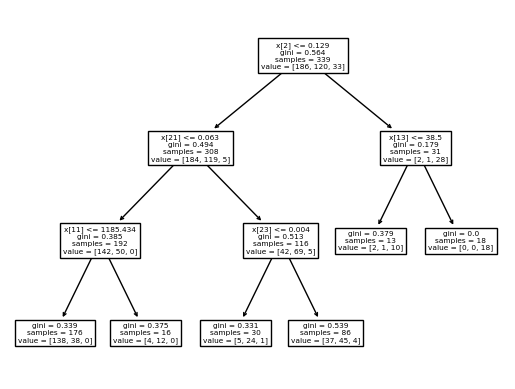

In [14]:
# print the model
from sklearn import tree
tree.plot_tree(model)

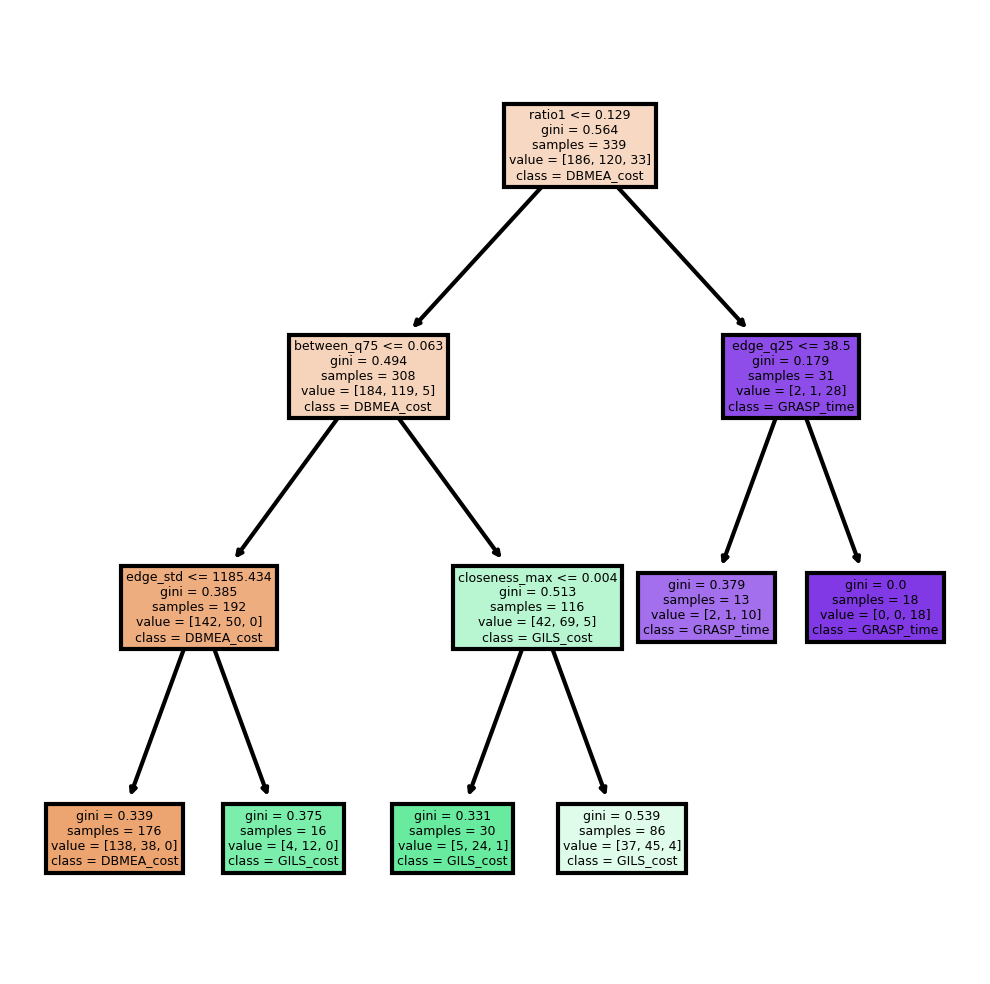

In [15]:
from matplotlib import pyplot as plt

# add the feature names to the tree
fn = X.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [16]:
# save the tree
fig.savefig('tree.png')


In [17]:
# save the model to a file
import pickle
pickle.dump(model, open('decisiontree.pkl', 'wb'))

In [20]:
# cross validation for random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
# n estimators from 10 to 100 in steps of 10
space['n_estimators'] = [i for i in range(10, 151, 10)]
# max features from 1 to 10
space['max_features'] = [i for i in range(1, 11)]

space['max_depth'] = [3,4,5]
# min samples split from 2 to 20
space['min_samples_split'] = [5,6,7,8,9,10]
# min samples leaf
space['min_samples_leaf'] = [10,11,12,13,14,15]
# bootstrap from true or false
space['bootstrap'] = [True, False]
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-2, cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.7039809863339275
Best Hyperparameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 14, 'min_samples_split': 9, 'n_estimators': 90}


In [21]:
import winsound
duration = 2000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

In [22]:
# train a random forest using the best parameters
model = RandomForestClassifier(bootstrap=False, max_depth=5, max_features=10, min_samples_leaf=14, min_samples_split=9, n_estimators=90)
model.fit(X, y)


RandomForestClassifier(bootstrap=False, max_depth=5, max_features=10,
                       min_samples_leaf=14, min_samples_split=9,
                       n_estimators=90)

In [23]:
# predict
y_pred = model.predict(X)


In [24]:
# check accuracy
accuracy_score(y, y_pred)


0.7699115044247787

In [25]:
# check confusion matrix
confusion_matrix(y, y_pred)


array([[160,  24,   2],
       [ 46,  73,   1],
       [  4,   1,  28]], dtype=int64)

In [26]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

  DBMEA_cost       0.76      0.86      0.81       186
   GILS_cost       0.74      0.61      0.67       120
  GRASP_time       0.90      0.85      0.88        33

    accuracy                           0.77       339
   macro avg       0.80      0.77      0.78       339
weighted avg       0.77      0.77      0.77       339



In [27]:
# save the model to a file
import pickle
pickle.dump(model, open('randomforest.pkl', 'wb'))


In [30]:
# print feature importances
importance = model.feature_importances_
# add feature names
importance = pd.DataFrame(importance, index=X.columns, columns=["Importance"])
# sort by importance
importance = importance.sort_values(by='Importance', ascending=False)
importance



,Importance
between_q75,0.112178
m,0.089525
ratio1,0.089230
between_mean,0.080195
n,0.079845
mst_size,0.064839
ratio2,0.061871
between_q25,0.053791
density,0.051668
avg_clustering,0.047040


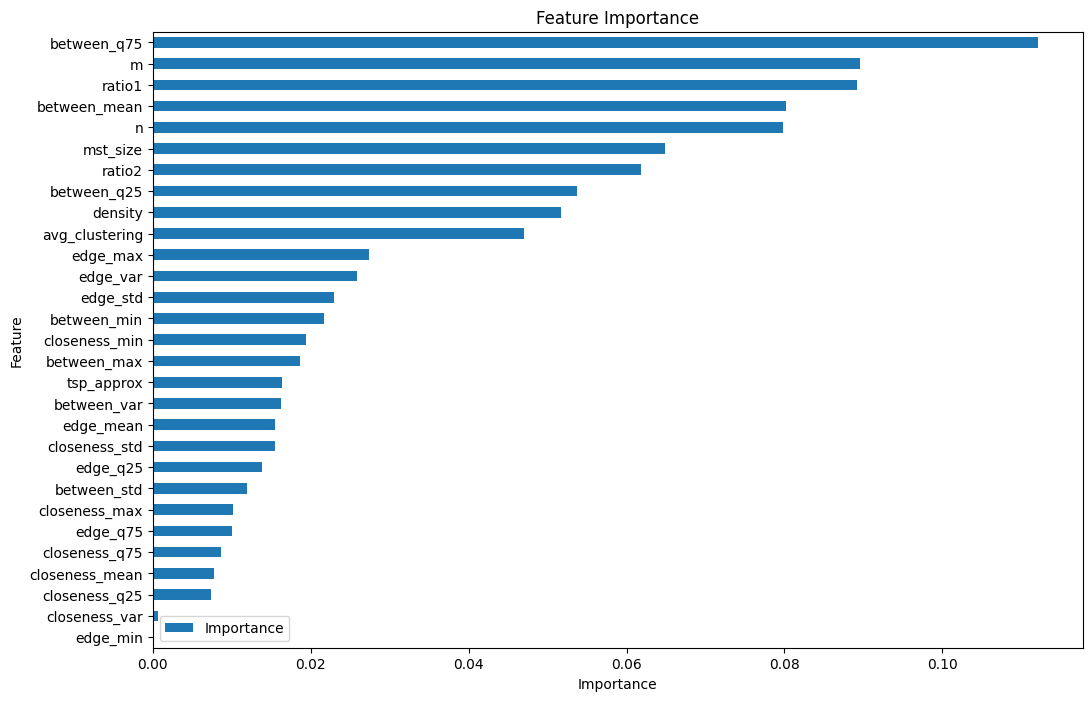

In [34]:
# make a bar plot
importance = model.feature_importances_
# add feature names
importance = pd.DataFrame(importance, index=X.columns, columns=["Importance"])
# sort by importance
importance = importance.sort_values(by='Importance', ascending=True)
importance.plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png', dpi=300)
plt.show()